In [1]:
# Import libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from lifelines.statistics import multivariate_logrank_test
import matplotlib.pyplot as plt
import seaborn as sns

# Set theme
sns.set_theme(style='dark')
sns.set_palette(palette='Set2')

# Import and tidy data
%run tidy_data.py

# Code for data analysis
%run scripts.py

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 173
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 173 non-null    object  
 1   age                173 non-null    int64   
 2   variant_histology  173 non-null    category
 3   ypT_stage          173 non-null    category
 4   ypN_stage          173 non-null    category
 5   recurrence         172 non-null    category
 6   fu_recurrence      173 non-null    int64   
 7   dod                170 non-null    category
 8   doc                169 non-null    category
 9   fu_censor          173 non-null    int64   
 10  sex                173 non-null    object  
 11  year_cystectomy    173 non-null    float64 
 12  ypT_group1         173 non-null    category
 13  ypT_group2         173 non-null    category
 14  ypN_group1         173 non-null    category
 15  ypN_group2         173 non-null    category
 16  dre     

# Survival Curves - Tumor recurrence

In [2]:
# Copy full dataframe and drop NAN values
df_recurrence = df.dropna(subset=['recurrence']).copy()

# Create dummy variable
df_recurrence = pd.get_dummies(df_recurrence, columns=['recurrence'], drop_first=True)

# Rename dummy variable
df_recurrence = df_recurrence.rename(columns={'recurrence_Yes':'recurrence'})

# Select columns for analysis
df_recurrence = df_recurrence[['ypT_group1','ypT_group2','ypN_group1','ypN_group2','recurrence','fu_recurrence']]

df_recurrence.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 173
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ypT_group1     172 non-null    category
 1   ypT_group2     172 non-null    category
 2   ypN_group1     172 non-null    category
 3   ypN_group2     172 non-null    category
 4   recurrence     172 non-null    uint8   
 5   fu_recurrence  172 non-null    int64   
dtypes: category(4), int64(1), uint8(1)
memory usage: 4.0 KB


## By pT stage

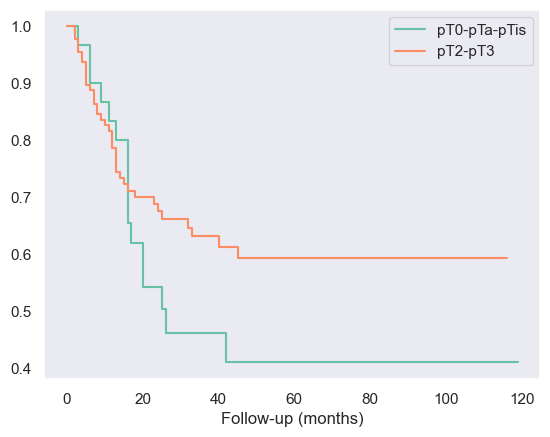

   test_statistic         p  -log2(p)
0        1.524341  0.216964  2.204474


In [3]:
# Define variables
df_survival = df_recurrence
group = 'ypT_group1'
time = 'fu_recurrence'
event = 'recurrence'

# Plot curves and run logrank test
do_survival(df_survival, group, time, event)

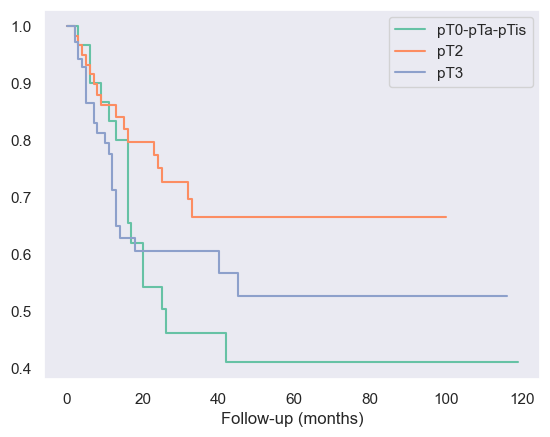

   test_statistic         p  -log2(p)
0        4.093653  0.129144  2.952946


In [4]:
# Define variables
df_survival = df_recurrence
group = 'ypT_group2'
time = 'fu_recurrence'
event = 'recurrence'

# Plot curves and run logrank test
do_survival(df_survival, group, time, event)

## By pN stage

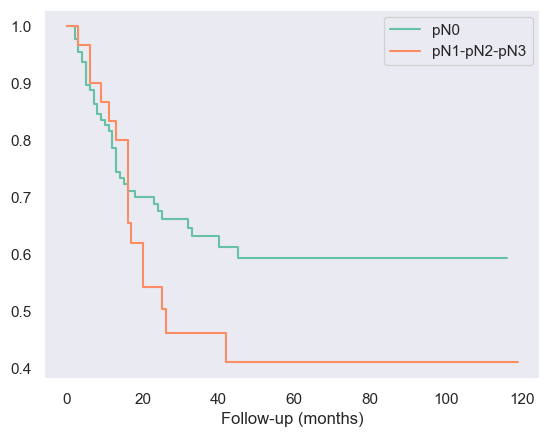

   test_statistic         p  -log2(p)
0        1.524341  0.216964  2.204474


In [5]:
# Define variables
df_survival = df_recurrence
group = 'ypN_group1'
time = 'fu_recurrence'
event = 'recurrence'

# Plot curves and run logrank test
do_survival(df_survival, group, time, event)

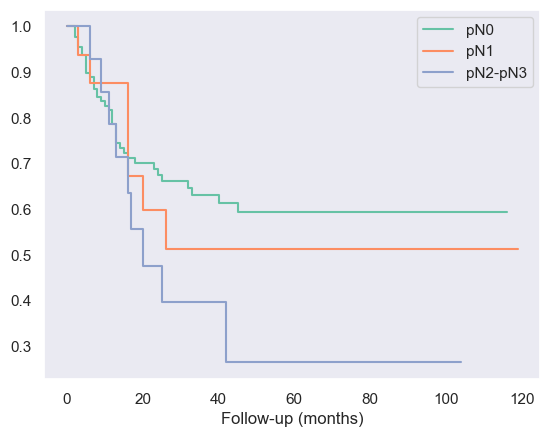

   test_statistic        p  -log2(p)
0        2.705407  0.25854  1.951539


In [6]:
# Define variables
df_survival = df_recurrence
group = 'ypN_group2'
time = 'fu_recurrence'
event = 'recurrence'

# Plot curves and run logrank test
do_survival(df_survival, group, time, event)

# Survival Curves - Death by cancer

In [7]:
# Copy full dataframe and drop NAN values
df_dod = df.dropna(subset=['dod']).copy()

# Create dummy variable
df_dod = pd.get_dummies(df_dod, columns=['dod'], drop_first=True)

# Rename dummy variable
df_dod = df_dod.rename(columns={'dod_Yes':'dod'})

# Select columns for analysis
df_dod = df_dod[['ypT_group1','ypT_group2','ypN_group1','ypN_group2','dod','fu_censor']]

df_dod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 173
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ypT_group1  170 non-null    category
 1   ypT_group2  170 non-null    category
 2   ypN_group1  170 non-null    category
 3   ypN_group2  170 non-null    category
 4   dod         170 non-null    uint8   
 5   fu_censor   170 non-null    int64   
dtypes: category(4), int64(1), uint8(1)
memory usage: 4.0 KB


## By pT stage

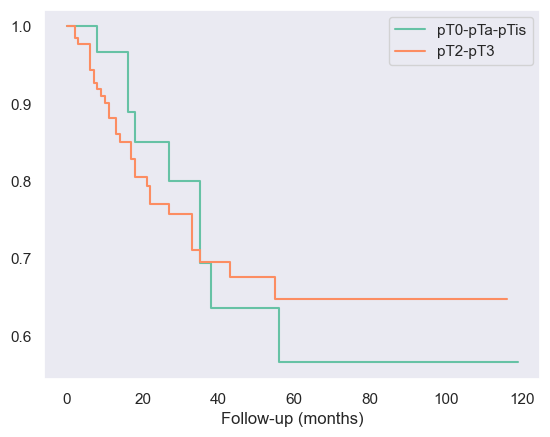

   test_statistic        p  -log2(p)
0        0.003829  0.95066  0.072998


In [8]:
# Define variables
df_survival = df_dod
group = 'ypT_group1'
time = 'fu_censor'
event = 'dod'

# Plot curves and run logrank test
do_survival(df_survival, group, time, event)

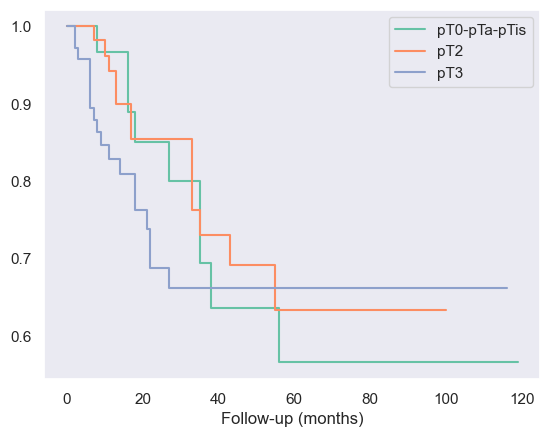

   test_statistic         p  -log2(p)
0        1.175079  0.555693   0.84764


In [9]:
# Define variables
df_survival = df_dod
group = 'ypT_group2'
time = 'fu_censor'
event = 'dod'

# Plot curves and run logrank test
do_survival(df_survival, group, time, event)

## By pN stage

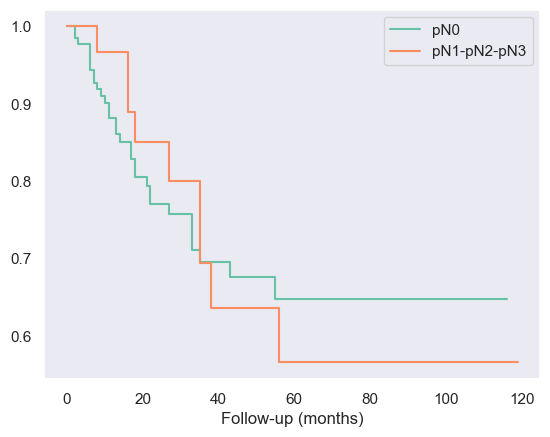

   test_statistic        p  -log2(p)
0        0.003829  0.95066  0.072998


In [10]:
# Define variables
df_survival = df_dod
group = 'ypN_group1'
time = 'fu_censor'
event = 'dod'

# Plot curves and run logrank test
do_survival(df_survival, group, time, event)

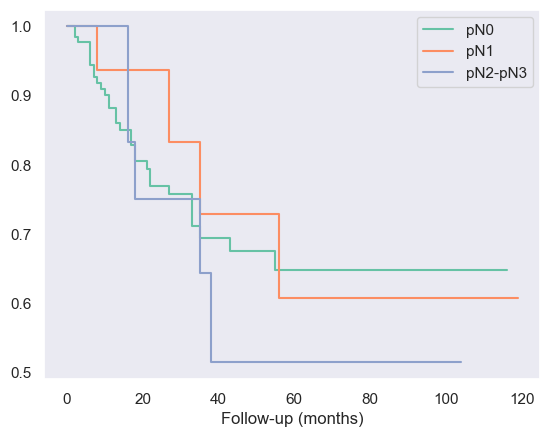

   test_statistic         p  -log2(p)
0        0.379097  0.827333   0.27346


In [11]:
# Define variables
df_survival = df_dod
group = 'ypN_group2'
time = 'fu_censor'
event = 'dod'

# Plot curves and run logrank test
do_survival(df_survival, group, time, event)

# Survival Curves - Death by other causes

In [12]:
# Copy full dataframe and drop NAN values
df_doc = df.dropna(subset=['doc']).copy()

# Create dummy variable
df_doc = pd.get_dummies(df_doc, columns=['doc'], drop_first=True)

# Rename dummy variable
df_doc = df_doc.rename(columns={'doc_Yes':'doc'})

# Select columns for analysis
df_doc = df_doc[['ypT_group1','ypT_group2','ypN_group1','ypN_group2','doc','fu_censor']]

df_doc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 173
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ypT_group1  169 non-null    category
 1   ypT_group2  169 non-null    category
 2   ypN_group1  169 non-null    category
 3   ypN_group2  169 non-null    category
 4   doc         169 non-null    uint8   
 5   fu_censor   169 non-null    int64   
dtypes: category(4), int64(1), uint8(1)
memory usage: 4.0 KB


## By pT stage

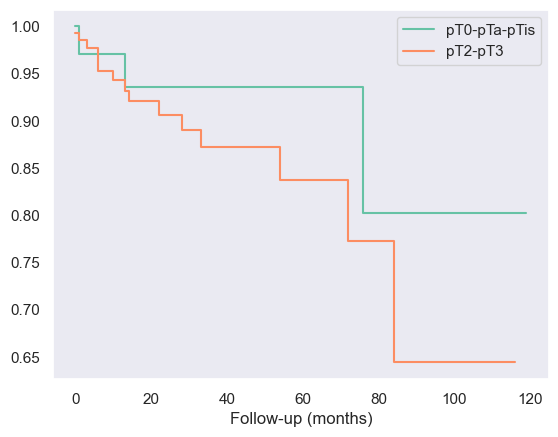

   test_statistic         p  -log2(p)
0        0.763624  0.382197  1.387612


In [13]:
# Define variables
df_survival = df_doc
group = 'ypT_group1'
time = 'fu_censor'
event = 'doc'

# Plot curves and run logrank test
do_survival(df_survival, group, time, event)


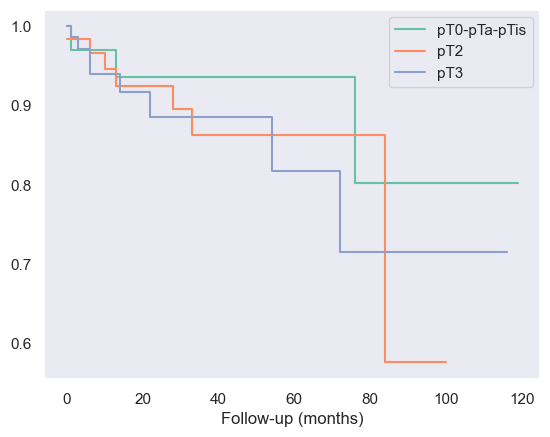

   test_statistic         p  -log2(p)
0        0.790354  0.673561   0.57012


In [14]:
# Define variables
df_survival = df_doc
group = 'ypT_group2'
time = 'fu_censor'
event = 'doc'

# Plot curves and run logrank test
do_survival(df_survival, group, time, event)

## By pN stage

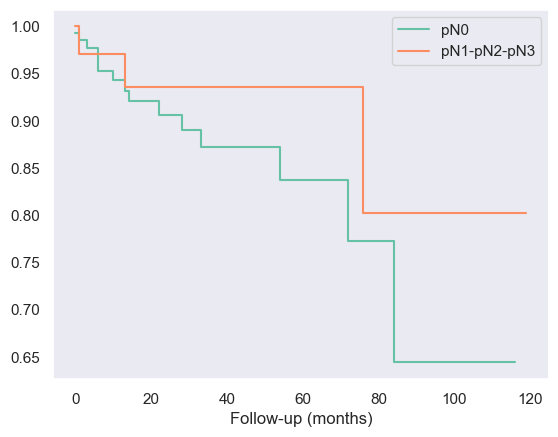

   test_statistic         p  -log2(p)
0        0.763624  0.382197  1.387612


In [15]:
# Define variables
df_survival = df_doc
group = 'ypN_group1'
time = 'fu_censor'
event = 'doc'

# Plot curves and run logrank test
do_survival(df_survival, group, time, event)

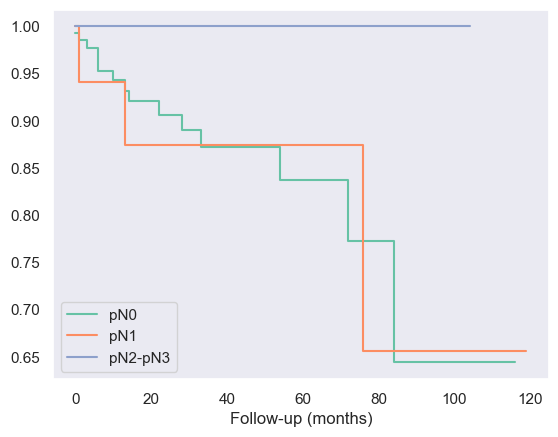

   test_statistic         p  -log2(p)
0        2.488733  0.288123  1.795242


In [16]:
# Define variables
df_survival = df_doc
group = 'ypN_group2'
time = 'fu_censor'
event = 'doc'

# Plot curves and run logrank test
do_survival(df_survival, group, time, event)

# Survival Curves - Disease-related event

In [17]:
# Copy full dataframe and drop NAN values
df_dre = df.dropna(subset=['dre']).copy()

# Create dummy variable
df_dre = pd.get_dummies(df_dre, columns=['dre'], drop_first=True)

# Rename dummy variable
df_dre = df_dre.rename(columns={'dre_Yes':'dre'})

# Select columns for analysis
df_dre = df_dre[['ypT_group1','ypT_group2','ypN_group1','ypN_group2','dre','fu_censor']]

df_dre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 173
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ypT_group1  173 non-null    category
 1   ypT_group2  173 non-null    category
 2   ypN_group1  173 non-null    category
 3   ypN_group2  173 non-null    category
 4   dre         173 non-null    uint8   
 5   fu_censor   173 non-null    int64   
dtypes: category(4), int64(1), uint8(1)
memory usage: 4.0 KB


## By pT stage

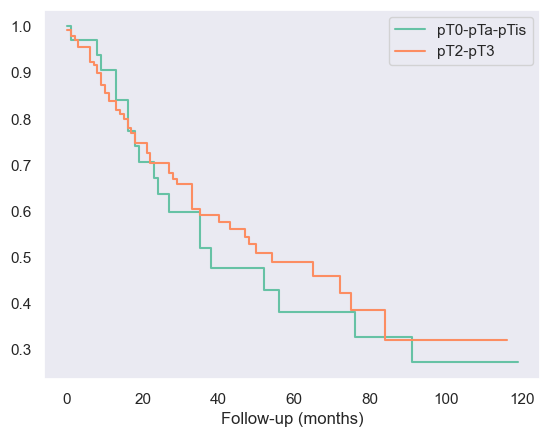

   test_statistic         p  -log2(p)
0        0.214854  0.642989  0.637134


In [18]:
# Define variables
df_survival = df_dre
group = 'ypT_group1'
time = 'fu_censor'
event = 'dre'

# Plot curves and run logrank test
do_survival(df_survival, group, time, event)

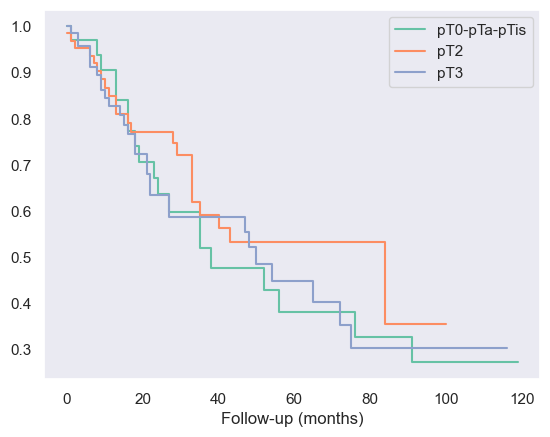

   test_statistic         p  -log2(p)
0        0.940352  0.624892   0.67832


In [19]:
# Define variables
df_survival = df_dre
group = 'ypT_group2'
time = 'fu_censor'
event = 'dre'

# Plot curves and run logrank test
do_survival(df_survival, group, time, event)

## By pN stage

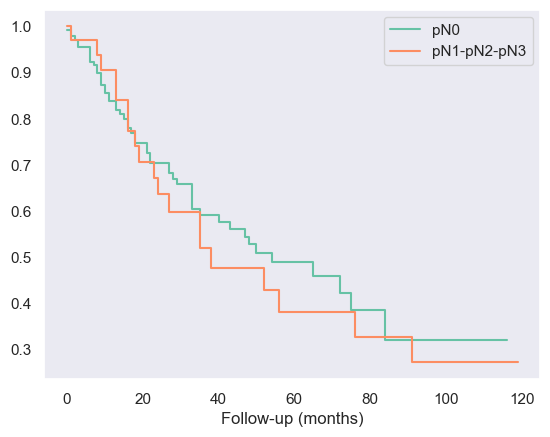

   test_statistic         p  -log2(p)
0        0.214854  0.642989  0.637134


In [20]:
# Define variables
df_survival = df_dre
group = 'ypN_group1'
time = 'fu_censor'
event = 'dre'

# Plot curves and run logrank test
do_survival(df_survival, group, time, event)

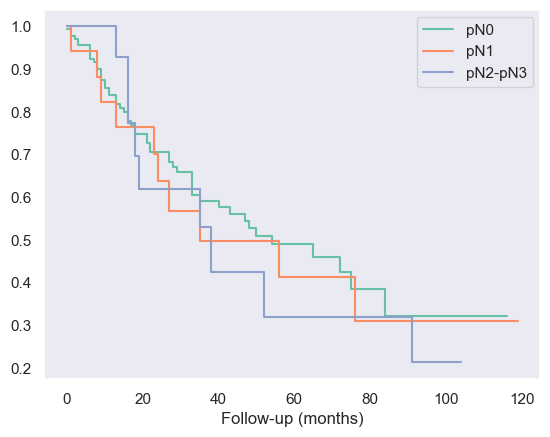

   test_statistic         p  -log2(p)
0        0.243435  0.885399  0.175601


In [21]:
# Define variables
df_survival = df_dre
group = 'ypN_group2'
time = 'fu_censor'
event = 'dre'

# Plot curves and run logrank test
do_survival(df_survival, group, time, event)